In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
# nltk.download('PorterStemmer')
from nltk.stem import PorterStemmer
# nltk.download('WordNetLemmatizer')
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('FreqDist')
from nltk.probability import FreqDist

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn import decomposition
from sklearn.neighbors import KNeighborsRegressor

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/justingomez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/justingomez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justingomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load csv file into pandas data frame
df = pd.read_csv('All_Reviews.csv')
df.pop('Unnamed: 0')
df['review text'] = df['review text'].fillna("")
df

,filename,ranking,category,review ID,review name,reviewer's name,reviewer's profile,review rating,review date,review text,verified purchase,vine customer review of free product,images,image 1,image 2,image 3,image 4
0,Reviews/1_0984782850.csv,1.0,NaN,R32BJK81FRH8ME,A contemporary codex,@TheScott463,https://www.amazon.com/gp/profile/amzn1.accoun...,4,"August 1, 2019","Good examples, explanations, and problems. Tit...",True,False,NaN,NaN,NaN,NaN,NaN
1,Reviews/1_0984782850.csv,1.0,NaN,RCIPQTOLBAOE6,great book to solidify knowledge,A & E Ingram,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"July 6, 2020",Used this book to practice for interviewing af...,True,False,NaN,NaN,NaN,NaN,NaN
2,Reviews/1_0984782850.csv,1.0,NaN,R3VU8PXI6SI58X,This revised edition is worth purchasing. Sur...,A Reviewer,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"March 22, 2017",This revised edition is worth purchasing. Sure...,False,False,NaN,NaN,NaN,NaN,NaN
3,Reviews/1_0984782850.csv,1.0,NaN,R32XY85RY4W2LX,Must have for interview preparation!,A. P,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"December 21, 2015",This one's a must have for interview preparati...,True,False,NaN,NaN,NaN,NaN,NaN
4,Reviews/1_0984782850.csv,1.0,NaN,R21KYICVT6BKWC,The best part is,A. Quesenberry,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 10, 2017",The definitive book to help you prepare for an...,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15903,Reviews/100_1840788119.csv,100.0,NaN,R1BS8378SXGVUH,easy to read,msbetty,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"April 30, 2020",I got this for a friend who has no idea about ...,True,False,NaN,NaN,NaN,NaN,NaN
15904,Reviews/100_1840788119.csv,100.0,NaN,R3M3WGCVTP7UF5,Gift for a younng traveling man.,receivers sweet ok,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 17, 2019",WoW...I ordered this last night and it has bee...,True,False,NaN,NaN,NaN,NaN,NaN
15905,Reviews/100_1840788119.csv,100.0,NaN,R598W47BQ0DXS,Waste of paper.,relieved,https://www.amazon.com/gp/profile/amzn1.accoun...,1,"January 11, 2020",Did not provide any helpful information. Total...,True,False,NaN,NaN,NaN,NaN,NaN
15906,Reviews/100_1840788119.csv,100.0,NaN,R302EBDYXNZMS3,Nice but need larger writing for seniors,simigal42,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"September 16, 2019",Nice product but ordered in error had to trturn,True,False,NaN,NaN,NaN,NaN,NaN


# Text Mining

### Pre-processing reviews

In [3]:
#Create function to remove punctations

text = 'This is a sampled sentence, showing off the process of the word filtration system.'
# text = 'filtrate filtration filter'

def punk_remove(text):
    words = nltk.word_tokenize(text)
    new_words = [word.lower() for word in words if word.isalnum()]
    return new_words

rempunk_text = punk_remove(text)
print(rempunk_text)


['this', 'is', 'a', 'sampled', 'sentence', 'showing', 'off', 'the', 'process', 'of', 'the', 'word', 'filtration', 'system']


In [4]:
#Create function to filter a review

stop_words = set(stopwords.words('english'))  
def filter_text(text):
    word_tokens = text
    filtered_text = [w for w in word_tokens if not w in stop_words]
    filtered_text = []  
    for w in word_tokens:  
        if w not in stop_words:  
            filtered_text.append(w)
    return filtered_text

filtered_text = filter_text(rempunk_text)
print(filtered_text) 


['sampled', 'sentence', 'showing', 'process', 'word', 'filtration', 'system']


In [5]:
#Create function to perform stemming a list of words

ps = PorterStemmer()
def stem_text(text_list):
    stemmed_words=[]
    for w in text_list:
        stemmed_words.append(ps.stem(w))
    return stemmed_words

stemmed_words = stem_text(filtered_text)
print(stemmed_words)
    

['sampl', 'sentenc', 'show', 'process', 'word', 'filtrat', 'system']


In [6]:
#Create function to lemmatize a list of words

lem = WordNetLemmatizer()
def lemmatize_text(text_list):
    lemmatized_words=[]
    for w in text_list:
        lemmatized_words.append(lem.lemmatize(w,'v'))
    return lemmatized_words

lemmatized_words = lemmatize_text(filtered_text)
print(lemmatized_words)

['sample', 'sentence', 'show', 'process', 'word', 'filtration', 'system']


In [7]:
#Process all reviews and fill 'review processed' column
#df_temp = df.head(1000)
df['review processed'] = np.nan
for i in range(df.shape[0]):
    df['review processed'][i] = lemmatize_text(filter_text(stem_text(punk_remove(df['review text'][i]))))
    
df

<ipython-input-7-3c61ce5750f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review processed'][i] = lemmatize_text(filter_text(stem_text(punk_remove(df['review text'][i]))))
/Users/justingomez/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,filename,ranking,category,review ID,review name,reviewer's name,reviewer's profile,review rating,review date,review text,verified purchase,vine customer review of free product,images,image 1,image 2,image 3,image 4,review processed
0,Reviews/1_0984782850.csv,1.0,NaN,R32BJK81FRH8ME,A contemporary codex,@TheScott463,https://www.amazon.com/gp/profile/amzn1.accoun...,4,"August 1, 2019","Good examples, explanations, and problems. Tit...",True,False,NaN,NaN,NaN,NaN,NaN,"[good, exampl, explan, problem, titl, rip, cov..."
1,Reviews/1_0984782850.csv,1.0,NaN,RCIPQTOLBAOE6,great book to solidify knowledge,A & E Ingram,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"July 6, 2020",Used this book to practice for interviewing af...,True,False,NaN,NaN,NaN,NaN,NaN,"[use, thi, book, practic, interview, complet, ..."
2,Reviews/1_0984782850.csv,1.0,NaN,R3VU8PXI6SI58X,This revised edition is worth purchasing. Sur...,A Reviewer,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"March 22, 2017",This revised edition is worth purchasing. Sure...,False,False,NaN,NaN,NaN,NaN,NaN,"[thi, revis, edit, worth, purchas, sure, enoug..."
3,Reviews/1_0984782850.csv,1.0,NaN,R32XY85RY4W2LX,Must have for interview preparation!,A. P,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"December 21, 2015",This one's a must have for interview preparati...,True,False,NaN,NaN,NaN,NaN,NaN,"[thi, one, must, interview, prepar, thi, new, ..."
4,Reviews/1_0984782850.csv,1.0,NaN,R21KYICVT6BKWC,The best part is,A. Quesenberry,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 10, 2017",The definitive book to help you prepare for an...,False,False,NaN,NaN,NaN,NaN,NaN,"[definit, book, help, prepar, interview, much,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15903,Reviews/100_1840788119.csv,100.0,NaN,R1BS8378SXGVUH,easy to read,msbetty,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"April 30, 2020",I got this for a friend who has no idea about ...,True,False,NaN,NaN,NaN,NaN,NaN,"[get, thi, friend, ha, idea, comput]"
15904,Reviews/100_1840788119.csv,100.0,NaN,R3M3WGCVTP7UF5,Gift for a younng traveling man.,receivers sweet ok,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 17, 2019",WoW...I ordered this last night and it has bee...,True,False,NaN,NaN,NaN,NaN,NaN,"[wow, order, thi, last, night, ha, hand, deliv..."
15905,Reviews/100_1840788119.csv,100.0,NaN,R598W47BQ0DXS,Waste of paper.,relieved,https://www.amazon.com/gp/profile/amzn1.accoun...,1,"January 11, 2020",Did not provide any helpful information. Total...,True,False,NaN,NaN,NaN,NaN,NaN,"[provid, ani, help, inform, total, wast, money]"
15906,Reviews/100_1840788119.csv,100.0,NaN,R302EBDYXNZMS3,Nice but need larger writing for seniors,simigal42,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"September 16, 2019",Nice product but ordered in error had to trturn,True,False,NaN,NaN,NaN,NaN,NaN,"[nice, product, order, error, trturn]"


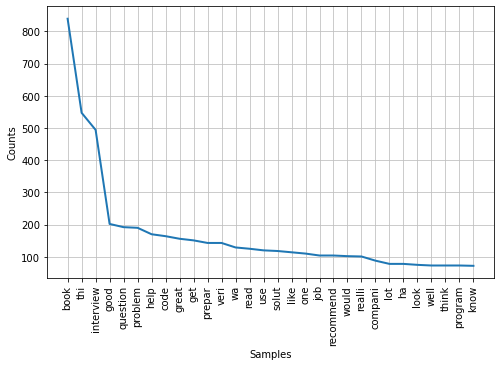

In [8]:

for rank in range(1,1+1):
    review = df['review processed'].copy()
    ranking = df['ranking'].copy()

    review = review[ranking==rank]
    ranking = ranking[ranking==rank]

    review = review.reset_index(drop='True')
    ranking = ranking.reset_index(drop='True')


    entire_wordset=[]
    for i in range(review.shape[0]):
        entire_wordset += review[i]

    fdist = FreqDist(entire_wordset)

    # Frequency Distribution Plot of the top 30 most used words
    plt.figure(figsize=(8,5))
    fdist.plot(30,cumulative=False)
    
plt.show()

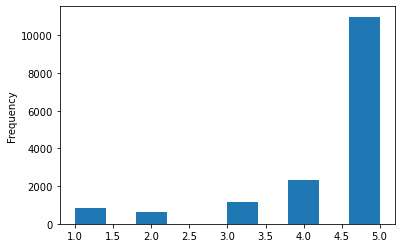

In [9]:
df['review rating'].plot.hist()

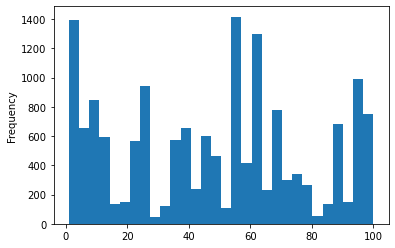

In [29]:
df['ranking'].plot.hist(bins=30)

# Vectorizing reviews

In [10]:
review_test = df.drop(columns = ['category','review ID',
        'review name', "reviewer's name", "reviewer's profile", 'review rating',
       'review date', 'verified purchase',
       'vine customer review of free product', 'images', 'image 1', 'image 2',
       'image 3', 'image 4'], axis = 1 )
review_test['review text'] = review_test['review text'].apply(str)
test_df = review_test.groupby('ranking')['review text'].apply(' '.join).reset_index()

rating_test = df.groupby('ranking')['review rating'].mean().reset_index()
test_df['review rating'] = rating_test['review rating']

test_df

,ranking,review text,review rating
0,1.0,"Good examples, explanations, and problems. Tit...",4.470985
1,2.0,"It was alright for a minute, then it was blah ...",4.460452
2,3.0,"Like many others have said, the content is gre...",4.427350
3,4.0,Great and useful content. Good book Great book...,4.603175
4,5.0,great book overall goes through all concepts i...,4.530435
...,...,...,...
93,96.0,This is a great book for both beginners and ad...,4.566434
94,97.0,This book doesn't cover that much about Alexa ...,4.108108
95,98.0,"Overall, this is a good book on Game Programmi...",4.776471
96,99.0,What a fantastic book! I've looked at hundreds...,4.360308


In [11]:

#df['bag of words'] = np.nan

vectorizer = TfidfVectorizer(strip_accents='ascii')
vectors = vectorizer.fit_transform(test_df['review text'])
#vectors.toarray()
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_vect = pd.DataFrame(denselist, columns=feature_names)
#df_vectt = df_vect.head(10)
df_vect

# all_unique_words = set()
# for words_list in df_temp['review processed']:
#     all_unique_words = all_unique_words | set(words_list)
# all_unique_words = sorted(all_unique_words)
# set_size = len(all_unique_words)
# print(set_size)
# print(all_unique_words)

# def bag_of_words(processed_rev):
#     bag_vector = [0]*set_size
#     for word in processed_rev:
#         for i, w in enumerate(all_unique_words):
#             if w == word:
#                 bag_vector[i]="1"
#     return bag_vector

# for i in range(df_temp.shape[0]):
#     df_temp['bag of words'][i] = bag_of_words(df_temp['review processed'][i])

# df_temp['bag of words']


,00,000,0001,000x,001,002,005,006,007,01,...,zombies,zone,zones,zoo,zookeeper,zoom,zooms,zoos,zuckerberg,zuckerburg
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.001612,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004817,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.001084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Training and Testing Data

In [12]:
X = df_vect
# X.insert(0,'review rating',test_df['review rating'])
Y = test_df["ranking"]

print('Data size:',X.shape,Y.shape)

def train_test_split(X,Y,test_size=.20):
    step=int(1/test_size)
    X_test=X.iloc[::step,:]
    X_train=X.drop(X_test.index)
    Y_test=Y.iloc[::step]
    Y_train=Y.drop(Y_test.index)
    return(X_train,X_test,Y_train,Y_test)

Data size: (98, 24105) (98,)


# PCA

In [13]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y)

pca = decomposition.PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print('Training size:',X_train.shape,Y_train.shape)
print('Testing size:',X_test.shape,Y_test.shape)

Training size: (78, 3) (78,)
Testing size: (20, 3) (20,)


# Linear Regression

In [15]:
book_model = LinearRegression()
book_model.fit(X=X_train, y=Y_train)

Y_pred = book_model.predict(X=X_test)
LR_mae = (abs(Y_test-Y_pred)).mean()
LR_mae

24.181162161602593

In [16]:
def LR_train_test_error(X,Y,PCA_dim=None,use_PCA=True):
    #80:20 -> training:testing
    (X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=.20)
    
    #PCA
    if use_PCA:
        pca = decomposition.PCA(n_components=PCA_dim)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)
    
    #Linear Regression
    book_model = LinearRegression()
    book_model.fit(X=X_train, y=Y_train)
    
    #Mean Absolute Error
    Y_pred = book_model.predict(X=X_test)
    mae = (abs(Y_test-Y_pred)).mean()
    return mae

temp = X.drop(X.iloc[::5,:].index).shape
max_n = min(temp[0], temp[1]) - 1
print(max_n)

77


In [17]:
err=[]
for n in range(1,max_n):
    err.append(LR_train_test_error(X,Y,PCA_dim=n))
    
best_PCA_n = err.index(min(err))
print("Best n for PCA:", err[best_PCA_n])

Best n for PCA: 23.306838151299267


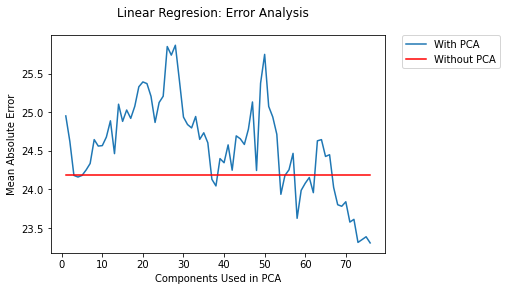

In [18]:
fig = plt.figure()

plt.plot([None]+err,label="With PCA")
yval = LR_mae
plt.plot([1,max_n-1],[yval,yval],'r',label="Without PCA")

fig.suptitle('Linear Regresion: Error Analysis')
plt.xlabel('Components Used in PCA')
plt.ylabel('Mean Absolute Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# K-Nearest Neighbors

In [19]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y)

pca = decomposition.PCA(n_components=best_PCA_n)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

mae_with_PCA = []
for k in range(1,max_n):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    mae = (abs(Y_test-predictions)).mean()
    mae_with_PCA.append(mae)
    
best_k_PCA = mae_with_PCA.index(min(mae_with_PCA))
print("Best k for KNN (with PCA):", best_k_PCA)
print("Best error for KNN (with PCA):", err[best_k_PCA])

mae_with_PCA = np.array(mae_with_PCA)

Best k for KNN (with PCA): 4
Best error for KNN (with PCA): 24.180975726295248


In [20]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y)

mae_without_PCA = []
for k in range(1,max_n):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    mae = (abs(Y_test-predictions)).mean()
    mae_without_PCA.append(mae)
    
best_k_noPCA = mae_without_PCA.index(min(mae_without_PCA))
print("Best k for KNN (without PCA):", best_k_noPCA)
print("Best error for KNN (without PCA):", err[best_k_noPCA])
    
mae_without_PCA = np.array(mae_without_PCA)

Best k for KNN (without PCA): 2
Best error for KNN (without PCA): 24.18119611156917


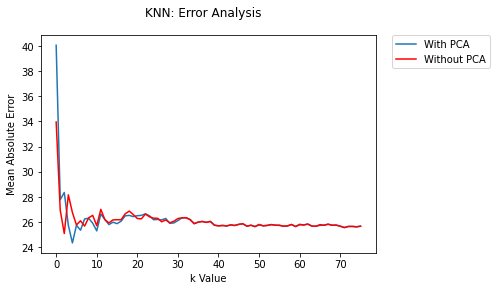

In [21]:
fig = plt.figure()

plt.plot(mae_with_PCA,label="With PCA")
yval = LR_train_test_error(X,Y,use_PCA=False)
plt.plot(mae_without_PCA,'r',label="Without PCA")

fig.suptitle('KNN: Error Analysis')
plt.xlabel('k Value')
plt.ylabel('Mean Absolute Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()